In [1]:
# Standard Packages
import pandas as pd
import numpy as np
import markdown

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt

# Scipy Stats
import scipy.stats as stats 

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols

# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

# Suppress future and deprecation warnings
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
hd = pd.read_csv("data/kc_house_data.csv")
f = open('data/column_names.md', 'r')
desc=markdown.markdown( f.read() )

In [3]:
hd.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [4]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [5]:
desc

'<h1>Column Names and Descriptions for King County Data Set</h1>\n<ul>\n<li><code>id</code> - Unique identifier for a house</li>\n<li><code>date</code> - Date house was sold</li>\n<li><code>price</code> - Sale price (prediction target)</li>\n<li><code>bedrooms</code> - Number of bedrooms</li>\n<li><code>bathrooms</code> - Number of bathrooms</li>\n<li><code>sqft_living</code> - Square footage of living space in the home</li>\n<li><code>sqft_lot</code> - Square footage of the lot</li>\n<li><code>floors</code> - Number of floors (levels) in house</li>\n<li><code>waterfront</code> - Whether the house is on a waterfront</li>\n<li>Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts</li>\n<li><code>greenbelt</code> - Whether the house is adjacent to a green belt</li>\n<li><code>nuisance</code> - Whether the house has traffic noise or other recorded nuisances</li>\n<li><code>view</code> - Quality of vie

In [6]:
hd = hd[~hd['address'].isin(['Washington'])]
hd.shape

(30155, 25)

In [7]:
hd["address"][10000][-20:-15]

'98042'

In [8]:
hd["zip"] = hd.address.str[-20:-15]

In [9]:
wrong_zip = hd.loc[~hd['zip'].str.startswith('9')]
hd.drop(index = wrong_zip.index, inplace = True, axis = 0)
hd = hd.drop_duplicates(subset=["id"])

In [10]:
hd["year_sold"] = hd.date.str[-4:].astype(int)
hd

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip,year_sold
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,2022
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133,2021
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178,2021
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118,2021
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103,2021
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116,2021
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122,2022
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055,2022


In [11]:
hd["waterfront"].value_counts()

NO     28843
YES      516
Name: waterfront, dtype: int64

In [12]:
hd["greenbelt"].value_counts()

NO     28589
YES      770
Name: greenbelt, dtype: int64

In [13]:
hd["grade"].value_counts()

7 Average        11580
8 Good            8940
9 Better          3625
6 Low Average     2854
10 Very Good      1352
11 Excellent       402
5 Fair             392
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
1 Cabin              2
2 Substandard        2
Name: grade, dtype: int64

In [14]:
hd["zip"].value_counts()

98042    992
98038    858
98103    761
98115    761
98117    748
        ... 
98422      1
99203      1
99223      1
92250      1
99403      1
Name: zip, Length: 121, dtype: int64

In [15]:
zips=[98052,98115,98103,98092,98042,98023,98105,98003,98034,98118,98133,98058,98125,98031,98122,98033,98006,98032,98030,98004,98001,98059,98117,98056,98198,98168,98155,98027,98109,98002,98038,98144,98146,98074,98119,98007,98040,98029,98107,98011,98108,98072,98106,98178,98116,98112,98008,98053,98028,98126,98188,98102,98055,98075,98177,98022,98166,98199,98005,98121,98136,98045,98057,98019,98104,98077,98101,98065,98148,98070,98014,98354,98024,98051,98010,98047,98251,98134,98039,98195,98158,98068,98256,98288,98050,98132,98171,98184,98054,98009,98013,98015,98025,98035,98041,98062,98064,98063,98071,98073,98083,98089,98093,98111,98113,98114,98124,98127,98131,98129,98139,98138,98141,98145,98151,98154,98160,98164,98161,98165,98170,98174,98175,98181,98185,98190,98194,98191,98224,98471,98481]

In [16]:
zips_strings = [str(i) for i in zips]
zips_strings

['98052',
 '98115',
 '98103',
 '98092',
 '98042',
 '98023',
 '98105',
 '98003',
 '98034',
 '98118',
 '98133',
 '98058',
 '98125',
 '98031',
 '98122',
 '98033',
 '98006',
 '98032',
 '98030',
 '98004',
 '98001',
 '98059',
 '98117',
 '98056',
 '98198',
 '98168',
 '98155',
 '98027',
 '98109',
 '98002',
 '98038',
 '98144',
 '98146',
 '98074',
 '98119',
 '98007',
 '98040',
 '98029',
 '98107',
 '98011',
 '98108',
 '98072',
 '98106',
 '98178',
 '98116',
 '98112',
 '98008',
 '98053',
 '98028',
 '98126',
 '98188',
 '98102',
 '98055',
 '98075',
 '98177',
 '98022',
 '98166',
 '98199',
 '98005',
 '98121',
 '98136',
 '98045',
 '98057',
 '98019',
 '98104',
 '98077',
 '98101',
 '98065',
 '98148',
 '98070',
 '98014',
 '98354',
 '98024',
 '98051',
 '98010',
 '98047',
 '98251',
 '98134',
 '98039',
 '98195',
 '98158',
 '98068',
 '98256',
 '98288',
 '98050',
 '98132',
 '98171',
 '98184',
 '98054',
 '98009',
 '98013',
 '98015',
 '98025',
 '98035',
 '98041',
 '98062',
 '98064',
 '98063',
 '98071',
 '98073',


In [17]:
zips = zips_strings

In [18]:
non_wa_zips = hd.loc[~hd["zip"].isin(zips)]
hd.drop(index = non_wa_zips.index, inplace = True, axis = 0)

In [19]:
hd = hd.drop(columns=["id", "lat", "long"])

In [20]:
hd["years_old"] = 2022-hd["yr_built"]
hd["years_old"].value_counts()

1      1354
54      516
44      493
45      484
55      474
       ... 
87       39
121      39
88       38
120      36
89       30
Name: years_old, Length: 123, dtype: int64

In [21]:
hd["zip"] = hd["zip"].astype(int)

In [22]:
hd["zip"] 

0        98055
1        98133
2        98178
3        98118
4        98027
         ...  
30150    98103
30151    98116
30152    98122
30153    98055
30154    98148
Name: zip, Length: 29214, dtype: int64

In [23]:
hd["bedrooms"].value_counts()

3     12338
4      9503
2      3547
5      2772
6       493
1       382
7        80
0        43
8        37
9        14
10        3
13        1
11        1
Name: bedrooms, dtype: int64

In [24]:
hd = hd.loc[hd["bedrooms"] > 1]
hd = hd.loc[hd["bedrooms"]<=5]

In [25]:
hd["bedrooms"].value_counts()

3    12338
4     9503
2     3547
5     2772
Name: bedrooms, dtype: int64

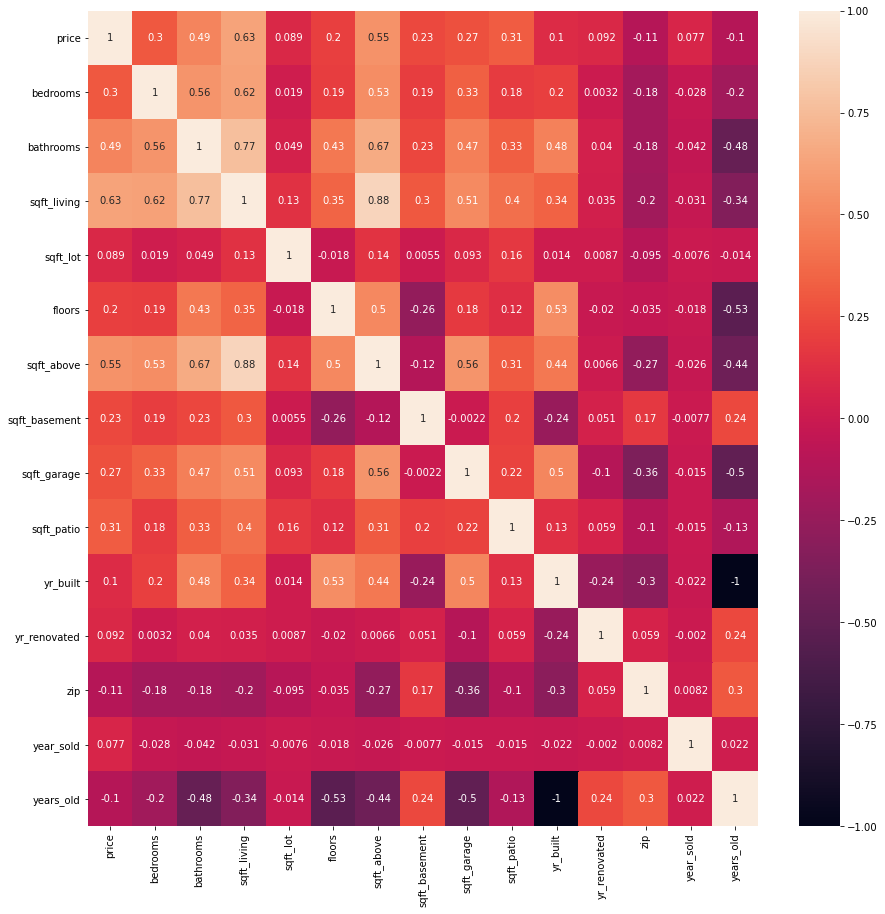

In [26]:
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(hd.corr(),annot=True);

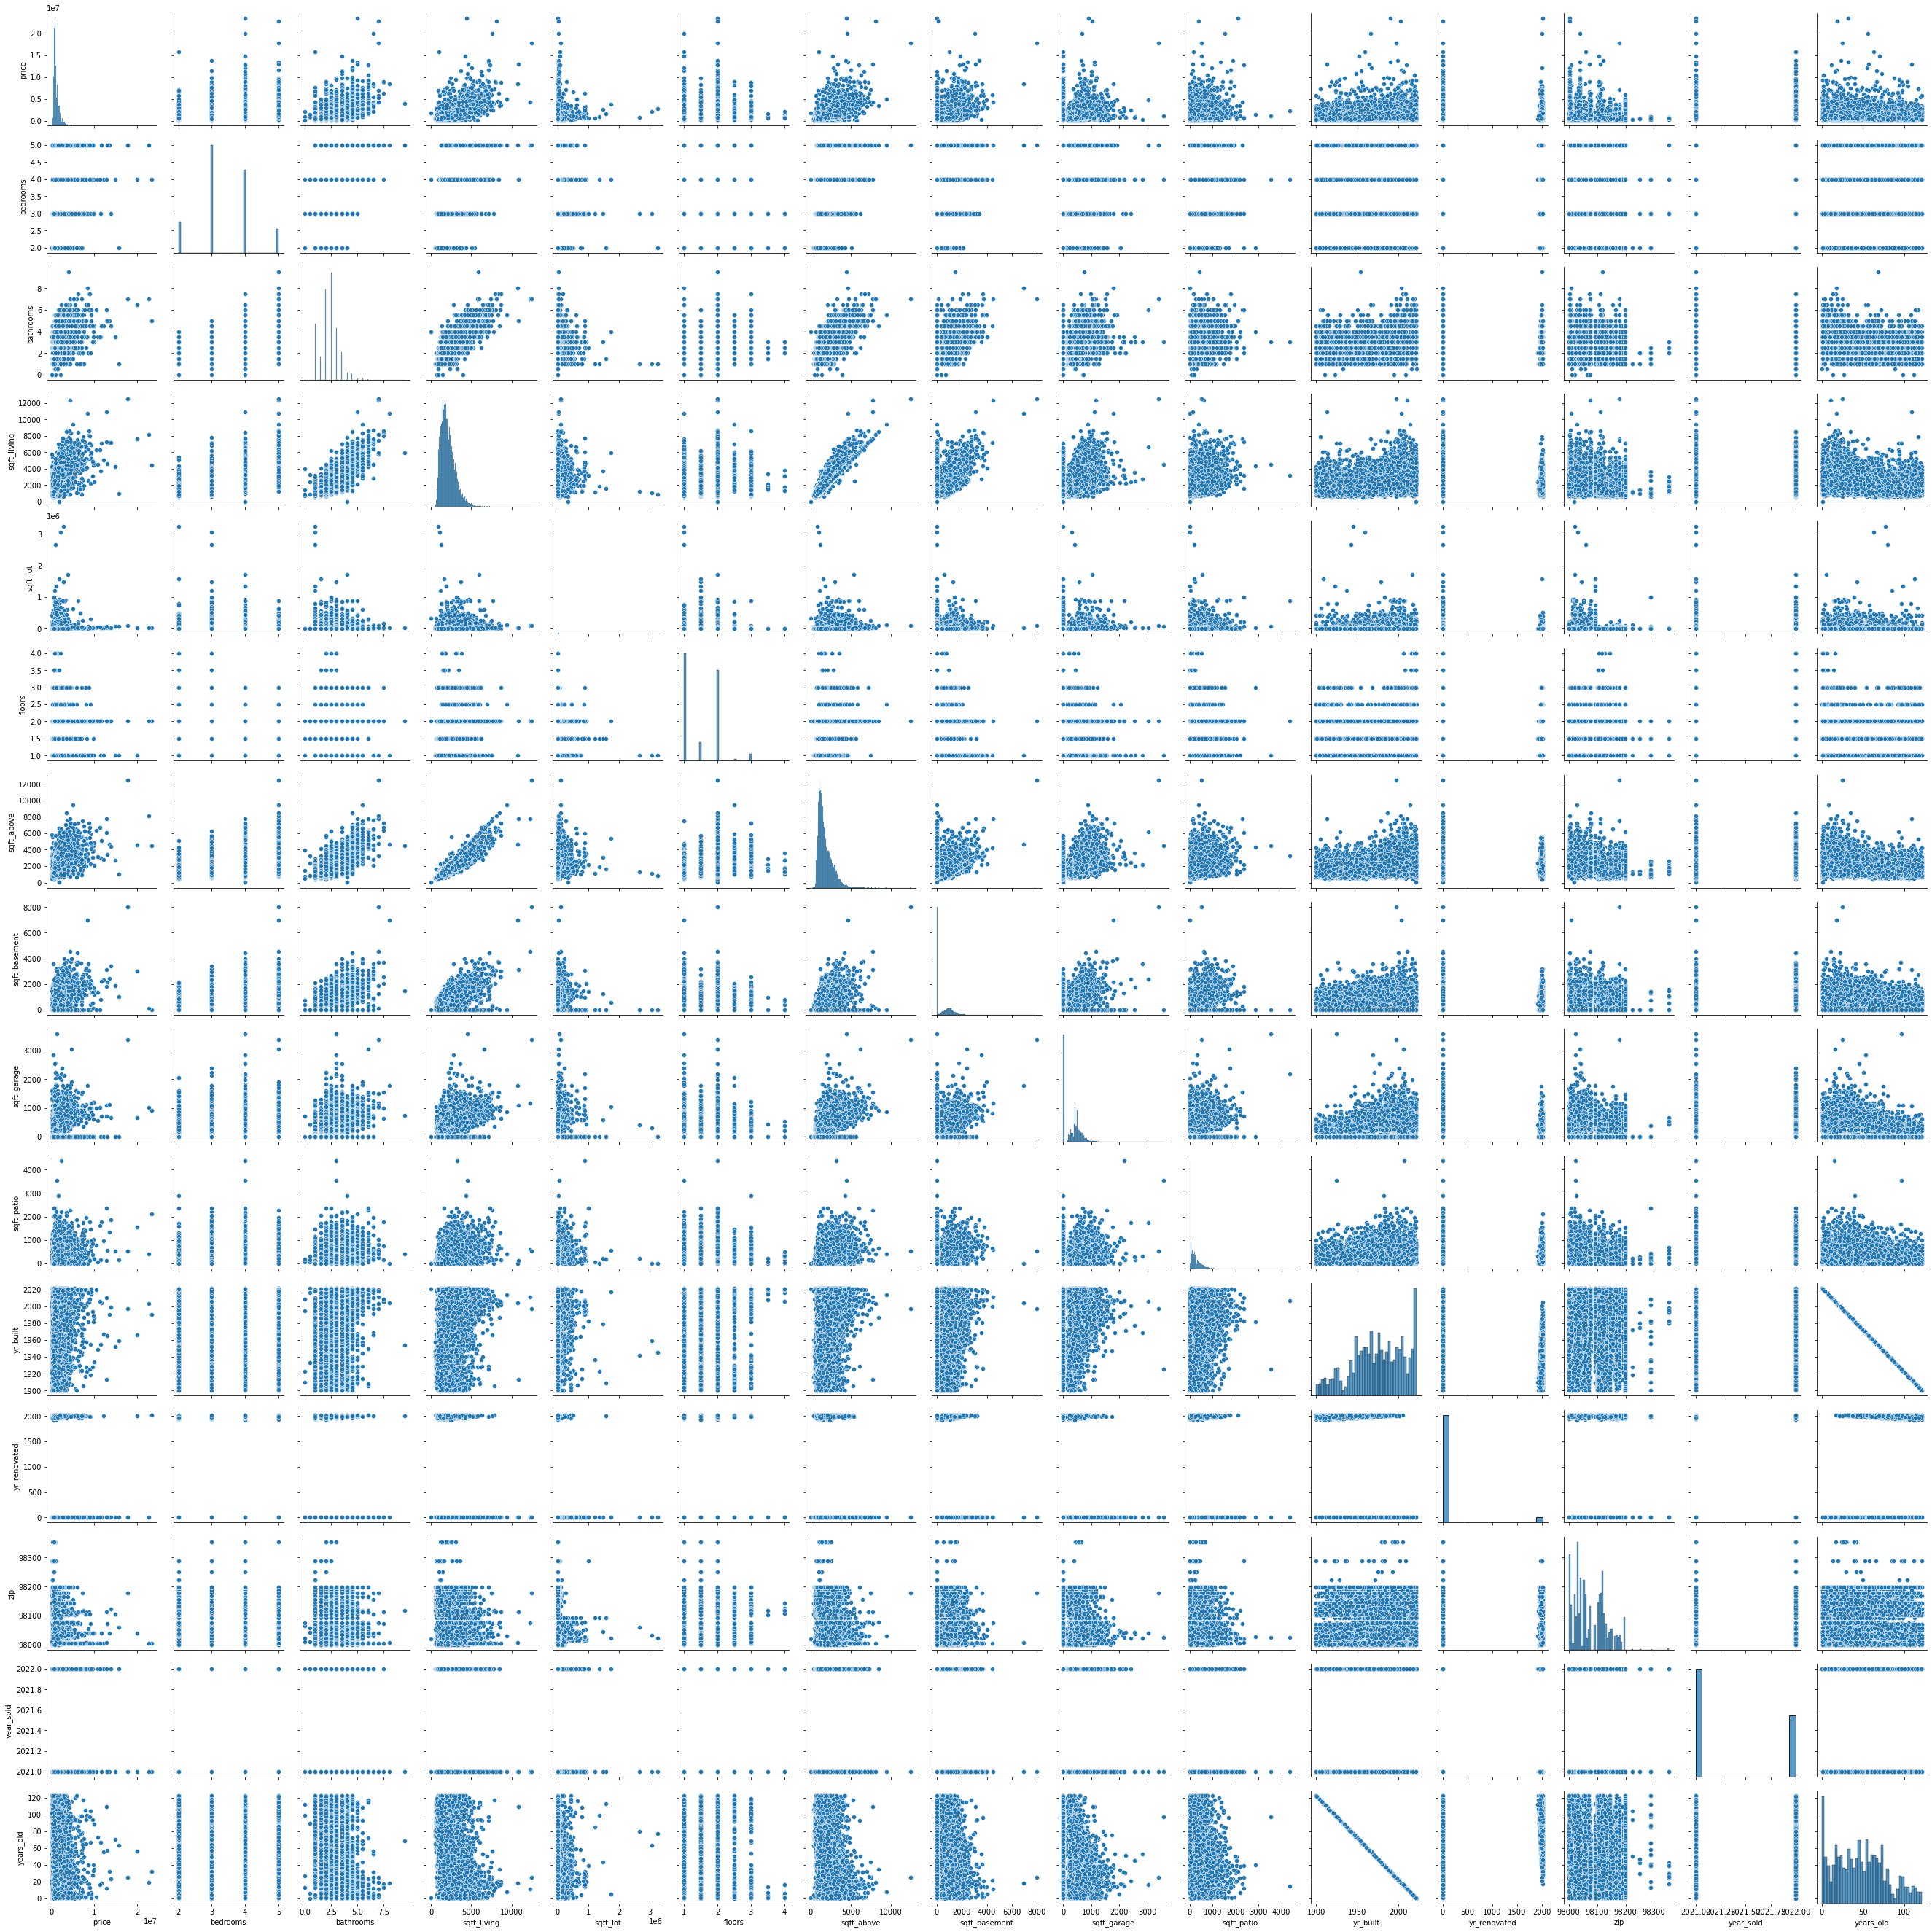

In [84]:
sns.pairplot(hd)

In [27]:
y = hd["price"]
X = hd[["sqft_living"]]
baseline = sm.OLS(y, sm.add_constant(X)).fit()
baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                 1.851e+04
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:13:17   Log-Likelihood:            -4.1709e+05
No. Observations:               28160   AIC:                         8.342e+05
Df Residuals:                   28158   BIC:                         8.342e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.105e+05   9708.521    -11.380      0.000    -1.3e+05   -9.15e+04
sqft_living   571.4344      4.200    136.044      0.000     563.201     579.667
==============================================================================
Omnibus:                    34704.604   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         15880730.190
Skew:                           6.253   Prob(JB):                         0.00
Kurtosis:                     118.665   Cond. No.                     5.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

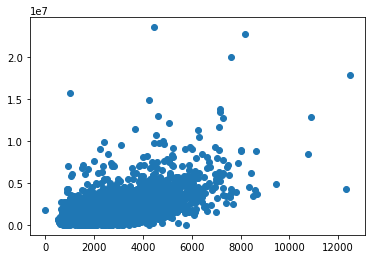

In [28]:
plt.scatter(x=hd["sqft_living"], y = hd["price"])

In [29]:
y = hd["price"]
X = hd[["sqft_living", "zip"]]
baseline = sm.OLS(y, sm.add_constant(X)).fit()
baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     9268.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:13:17   Log-Likelihood:            -4.1708e+05
No. Observations:               28160   AIC:                         8.342e+05
Df Residuals:                   28157   BIC:                         8.342e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.016e+07   7.15e+06     -4.220      0.000   -4.42e+07   -1.61e+07
sqft_living   575.0056      4.284    134.216      0.000     566.608     583.403
zip           306.2991     72.856      4.204      0.000     163.498     449.100
==============================================================================
Omnibus:                    34747.826   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         15943794.983
Skew:                           6.268   Prob(JB):                         0.00
Kurtosis:                     118.894   Cond. No.                     1.80e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We also tried sq_lot, and found it did not change R2 when in conjunction with sq_living, and on its own delivered a terrible R2 against price.

In [30]:
hd.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address',
       'zip', 'year_sold', 'years_old'],
      dtype='object')

In [31]:
geo=hd.drop(columns=['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio'])
geo

,price,yr_built,yr_renovated,address,zip,year_sold,years_old
0,675000.0,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",98055,2022,53
1,920000.0,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",98133,2021,72
3,775000.0,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",98118,2021,12
4,592500.0,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",98027,2021,10
5,625000.0,1948,0,"1602 North 185th Street, Shoreline, Washington...",98133,2021,74
...,...,...,...,...,...,...,...
30150,1555000.0,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",98103,2021,101
30151,1313000.0,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",98116,2021,11
30152,800000.0,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",98122,2022,27
30153,775000.0,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",98055,2022,16


In [32]:
prices = geo.drop(columns=["yr_built", "yr_renovated", "address", "year_sold", "years_old"])

In [33]:
prices = prices.groupby(by=["zip"]).mean().sort_values(by="price", ascending=False).reset_index()

In [34]:
prices

,zip,price
0,98039,4.953941e+06
1,98004,3.629345e+06
2,98040,2.661224e+06
3,98005,2.148578e+06
4,98033,2.021718e+06
...,...,...
73,98251,5.153000e+05
74,98047,4.911894e+05
75,98002,4.701631e+05
76,98288,4.419562e+05


In [35]:
zip_98039 = hd.loc[hd["zip"] == "98039"]
zip_98039

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,zip,year_sold,years_old


In [36]:
zip_98039["year_sold"].value_counts()

Series([], Name: year_sold, dtype: int64)

In [37]:
zip_98039["years_old"].value_counts().sort_values(ascending=False)

Series([], Name: years_old, dtype: int64)

In [38]:
zip_98039.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,zip,year_sold,years_old
price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_living,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_above,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_garage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_patio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
schools = pd.read_csv("data/Public_Schools.csv")

Schools data provided by https://data-seattlecitygis.opendata.arcgis.com/datasets/SeattleCityGIS::public-schools/about

In [40]:
schools=schools.drop(columns=["X", "Y", "OBJECTID", "PHONE", "WEBSITE", "XCOORD", "YCOORD", "SE_ANNO_CAD_DATA", "PRJ_ENRLLMNT"])

In [41]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TYPE      105 non-null    object
 1   SCHOOL    105 non-null    object
 2   ADDRESS   105 non-null    object
 3   NAME      105 non-null    object
 4   GRADE     103 non-null    object
 5   CITY      105 non-null    object
 6   ZIP       105 non-null    int64 
 7   SITE_USE  105 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.7+ KB


In [42]:
schools

,TYPE,SCHOOL,ADDRESS,NAME,GRADE,CITY,ZIP,SITE_USE
0,Elementary,DANIEL BAGLEY ELEM,7821 Stone Ave N,Daniel Bagley,K-5,Seattle,98103,Active
1,Option Elementary,CEDAR PARK BLDG,3737 NE 135th St,Cedar Park,K-5,Seattle,98125,Active
2,Elementary,HAY ELEM,201 Garfield St,Hay,K-5,Seattle,98109,Active
3,Elementary,JOHN MARSHALL,520 NE Ravenna Blvd,Viewlands - Interim,K-5,Seattle,98115,Interim
4,High School,INGRAHAM HIGH SCHOOL,1819 N 135th St,Ingraham Int'l,9-12,Seattle,98133,Active
...,...,...,...,...,...,...,...,...
100,Elementary,GATZERT ELEM,1301 E Yesler Way,Bailey Gatzert,K-5,Seattle,98122,Active
101,Option Elementary,WEBSTER,3015 NW 68th St,Licton Springs K-8,K-8,Seattle,98117,Active
102,Elementary,LOYAL HEIGHTS,7735 25th Ave NW,Loyal Heights,K-5,Seattle,98117,Active
103,Middle School,MCCLURE MIDDLE SCHOOL,1915 1st Ave W,McClure,6-8,Seattle,98119,Active


In [43]:
school_ranks = pd.read_csv("data/WASchools - Sheet1.csv")
school_ranks

,"Top 15 School Districts by Overall Quality, Washington State"
0,1. Bellevue School District
1,Academics (A+); Health & safety (A-); Survey r...
2,2. Bainbridge Island School District
3,Academics (A); Health & safety (A); Survey res...
4,3. Mercer Island School District
...,...
313,State assessment proficiency (96%); Top colleg...
314,"9. Roosevelt High School — Seattle, WA"
315,State assessment proficiency (90%); Top colleg...
316,"10. Bellevue High School — Bellevue, WA"


In [44]:
to_drop = school_ranks[30:]

In [45]:
school_ranks_names = school_ranks[::2].reset_index()
school_ranks_names["id"] = range(1, len(school_ranks_names) + 1)
school_ranks_names=school_ranks_names.rename(columns={"Top 15 School Districts by Overall Quality, Washington State": "name"})

In [46]:
school_ranks_names[15:30]

,index,name,id
15,30,Top 30 Public Elementary Schools by Overall Qu...,16
16,32,Academics (A); District overall experience (A+...,17
17,34,Academics (A); District overall experience (A+...,18
18,36,Academics (A); District overall experience (A+...,19
19,38,Academics (A); District overall experience (A+...,20
20,40,Academics (A); District overall experience (A+...,21
21,42,Academics (A); District overall experience (A+...,22
22,44,Academics (A); District overall experience (A+...,23
23,46,Academics (A); District overall experience (A+...,24
24,48,Academics (A); District overall experience (A+...,25


In [47]:
school_ranks_desc = school_ranks[1:317:2].reset_index()
school_ranks_desc["id"] = range(1, len(school_ranks_desc) + 1)
school_ranks_desc=school_ranks_desc.rename(columns={"Top 15 School Districts by Overall Quality, Washington State": "ranking"})

In [48]:
school_ranks_desc

,index,ranking,id
0,1,Academics (A+); Health & safety (A-); Survey r...,1
1,3,Academics (A); Health & safety (A); Survey res...,2
2,5,Academics (A+); Health & safety (A); Survey re...,3
3,7,Academics (A); Health & safety (B); Survey res...,4
4,9,Academics (A); Health & safety (A-); Survey re...,5
...,...,...,...
153,307,State assessment proficiency (91%); Top colleg...,154
154,309,State assessment proficiency (94%); Top colleg...,155
155,311,State assessment proficiency (98%); Top colleg...,156
156,313,State assessment proficiency (96%); Top colleg...,157


In [49]:
schoolsranks = pd.concat([school_ranks_names.set_index('id'),school_ranks_desc.set_index('id')], axis=1, join='inner')

In [50]:
schoolsranks = schoolsranks.drop(columns=["index", "index"])

In [51]:
schoolsranks

,name,ranking
id,,
1,1. Bellevue School District,Academics (A+); Health & safety (A-); Survey r...
2,2. Bainbridge Island School District,Academics (A); Health & safety (A); Survey res...
3,3. Mercer Island School District,Academics (A+); Health & safety (A); Survey re...
4,4. Camas School District,Academics (A); Health & safety (B); Survey res...
5,5. Lake Washington School District,Academics (A); Health & safety (A-); Survey re...
...,...,...
154,"5. Redmond High School — Redmond, WA",State assessment proficiency (91%); Top colleg...
155,"6. Issaquah High School — Issaquah, WA",State assessment proficiency (94%); Top colleg...
156,7. Bainbridge Island High School — Bainbridge ...,State assessment proficiency (98%); Top colleg...


In [52]:
schoolsranks[['name', 'location']] = schoolsranks.name.str.split("—", expand = True)

In [53]:
schoolsranks

,name,ranking,location
id,,,
1,1. Bellevue School District,Academics (A+); Health & safety (A-); Survey r...,None
2,2. Bainbridge Island School District,Academics (A); Health & safety (A); Survey res...,None
3,3. Mercer Island School District,Academics (A+); Health & safety (A); Survey re...,None
4,4. Camas School District,Academics (A); Health & safety (B); Survey res...,None
5,5. Lake Washington School District,Academics (A); Health & safety (A-); Survey re...,None
...,...,...,...
154,5. Redmond High School,State assessment proficiency (91%); Top colleg...,"Redmond, WA"
155,6. Issaquah High School,State assessment proficiency (94%); Top colleg...,"Issaquah, WA"
156,7. Bainbridge Island High School,State assessment proficiency (98%); Top colleg...,"Bainbridge Island, WA"


In [54]:
schoolsranks["name"]= schoolsranks["name"].str[3:]

In [55]:
schoolsranks

,name,ranking,location
id,,,
1,Bellevue School District,Academics (A+); Health & safety (A-); Survey r...,None
2,Bainbridge Island School District,Academics (A); Health & safety (A); Survey res...,None
3,Mercer Island School District,Academics (A+); Health & safety (A); Survey re...,None
4,Camas School District,Academics (A); Health & safety (B); Survey res...,None
5,Lake Washington School District,Academics (A); Health & safety (A-); Survey re...,None
...,...,...,...
154,Redmond High School,State assessment proficiency (91%); Top colleg...,"Redmond, WA"
155,Issaquah High School,State assessment proficiency (94%); Top colleg...,"Issaquah, WA"
156,Bainbridge Island High School,State assessment proficiency (98%); Top colleg...,"Bainbridge Island, WA"


In [56]:
districts = schoolsranks[0:15].drop(columns = ["location"])

In [57]:
districts[["1", "2", "3", "4", "5", "6", "7", "8"]] = districts.ranking.str.split(";", expand=True)
districts = districts.drop(columns=["ranking"])

In [58]:
districts

,name,1,2,3,4,5,6,7,8
id,,,,,,,,,
1,Bellevue School District,Academics (A+),Health & safety (A-),Survey responses (3.9/5.0),Student culture & diversity (A),Teachers (A+),Resources & facilities (B+),Extracurriculars & activities (B+),Sports & fitness (B).
2,Bainbridge Island School District,Academics (A),Health & safety (A),Survey responses (4.0/5.0),Student culture & diversity (C-),Teachers (A+),Resources & facilities (B+),Extracurriculars & activities (B),Sports & fitness (B).
3,Mercer Island School District,Academics (A+),Health & safety (A),Survey responses (3.6/5.0),Student culture & diversity (C+),Teachers (A),Resources & facilities (B-),Extracurriculars & activities (B+),Sports & fitness (A).
4,Camas School District,Academics (A),Health & safety (B),Survey responses (4.1/5.0),Student culture & diversity (B+),Teachers (A),Resources & facilities (A-),Extracurriculars & activities (B+),Sports & fitness (A).
5,Lake Washington School District,Academics (A),Health & safety (A-),Survey responses (3.9/5.0),Student culture & diversity (B+),Teachers (A),Resources & facilities (B),Extracurriculars & activities (B),Sports & fitness (B).
6,Orcas Island School District,Academics (A),Health & safety (A-),Student culture & diversity (B-),Teachers (A-),Resources & facilities (C),Extracurriculars & activities (B),Sports & fitness (B+).,None
7,Issaquah School District,Academics (A),Health & safety (B+),Survey responses (3.9/5.0),Student culture & diversity (B+),Teachers (A+),Resources & facilities (B),Extracurriculars & activities (B+),Sports & fitness (B).
8,Methow Valley School District,Academics (A-),Health & safety (A-),Student culture & diversity (B-),Teachers (A),Resources & facilities (B-),Extracurriculars & activities (B+),Sports & fitness (B+).,None
9,Shoreline School District,Academics (A-),Health & safety (A-),Survey responses (3.9/5.0),Student culture & diversity (A),Teachers (A-),Resources & facilities (B-),Extracurriculars & activities (B-),Sports & fitness (B).


In [59]:
schoolsranks.head(30)

,name,ranking,location
id,,,
1,Bellevue School District,Academics (A+); Health & safety (A-); Survey r...,None
2,Bainbridge Island School District,Academics (A); Health & safety (A); Survey res...,None
3,Mercer Island School District,Academics (A+); Health & safety (A); Survey re...,None
4,Camas School District,Academics (A); Health & safety (B); Survey res...,None
5,Lake Washington School District,Academics (A); Health & safety (A-); Survey re...,None
6,Orcas Island School District,Academics (A); Health & safety (A-); Student c...,None
7,Issaquah School District,Academics (A); Health & safety (B+); Survey re...,None
8,Methow Valley School District,Academics (A-); Health & safety (A-); Student ...,None
9,Shoreline School District,Academics (A-); Health & safety (A-); Survey r...,None


Data from http://www.usa.com/king-county-wa-public-schools.htm

In [60]:
new_school = pd.read_csv("data/New School Data - Sheet1.csv")

In [61]:
new_school[:14]

,Name
0,Islander Middle School (18.7 miles)
1,8225 Se 72nd
2,"Mercer Island, WA 98040"
3,phone: 206-236-3413
4,Regular Middle School Grade: Grade 6 to Grade 8
5,"Students: 1,059"
6,Medina Elementary School (20.5 miles)
7,8001 Ne 8th St
8,"Medina, WA 98039"
9,phone: 425-456-5400


In [62]:
schoolnames = new_school.loc[new_school["Name"].str.contains("miles")]
schoolnames["id"]=range(1, len(schoolnames) + 1)

<ipython-input-62-b2a3a4f23b62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schoolnames["id"]=range(1, len(schoolnames) + 1)


In [63]:
schoolloc = new_school.loc[new_school["Name"].str.contains("WA")]
schoolloc["id"]=range(1, len(schoolloc) + 1)
schoolloc=schoolloc.rename(columns={"Name": "Location"})
schoolloc

<ipython-input-63-3b67a0805004>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schoolloc["id"]=range(1, len(schoolloc) + 1)


,Location,id
2,"Mercer Island, WA 98040",1
8,"Medina, WA 98039",2
14,"Seattle, WA 98115",3
20,"Sammamish, WA 98074",4
26,"Seattle, WA 98115",5
...,...,...
3089,"Renton, WA 98056",518
3094,"Maple Valley, WA 98038",519
3100,"Ravensdale, WA 98051",520
3106,"Vashon, WA 98070",521


In [64]:
grade = new_school.loc[new_school["Name"].str.contains("Grade")]
grade["id"]=range(1, len(grade) + 1)
grade=grade.rename(columns={"Name": "grades"})
grade.grades = grade.grades.apply(lambda x: "middle" if "Middle" in x else x)
grade.grades = grade.grades.apply(lambda x: "elementary" if "Primary" in x else x)
grade.grades = grade.grades.apply(lambda x: "high" if "High" in x else x)
grade.grades = grade.grades.apply(lambda x: "kindergarten" if "Kindergarten" in x else x)
grade.grades = grade.grades.apply(lambda x: "prek" if "Prekindergarten" in x else x)
grade.grades = grade.grades.apply(lambda x: "special education" if "Special" in x else x)
grade.grades = grade.grades.apply(lambda x: "middle" if "Regular School Grade: Grade 6 to Grade 8" in x else x)
grade.grades = grade.grades.apply(lambda x: "other" if "Other" in x else x)
grade

<ipython-input-64-2b0e5647ba15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grade["id"]=range(1, len(grade) + 1)


,grades,id
4,middle,1
10,elementary,2
16,elementary,3
22,elementary,4
28,elementary,5
...,...,...
3091,high,518
3096,kindergarten,519
3102,other,520
3108,kindergarten,521


In [65]:
students = new_school.loc[new_school["Name"].str.contains("Students")]
students["id"]=range(1, len(students) + 1)
students=students.rename(columns={"Name": "student count"})

<ipython-input-65-46f254958dc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  students["id"]=range(1, len(students) + 1)


In [66]:
waschools = pd.concat([schoolnames.set_index('id'),schoolloc.set_index('id'), grade.set_index('id'), students.set_index('id')], axis=1, join='inner')

In [67]:
waschools["zip"] = waschools["Location"].str[-6:]
waschools[["student count", "count"]] = waschools["student count"].str.split(":", expand=True)
waschools=waschools.drop(columns=["student count", "Location"])

In [68]:
zips

['98052',
 '98115',
 '98103',
 '98092',
 '98042',
 '98023',
 '98105',
 '98003',
 '98034',
 '98118',
 '98133',
 '98058',
 '98125',
 '98031',
 '98122',
 '98033',
 '98006',
 '98032',
 '98030',
 '98004',
 '98001',
 '98059',
 '98117',
 '98056',
 '98198',
 '98168',
 '98155',
 '98027',
 '98109',
 '98002',
 '98038',
 '98144',
 '98146',
 '98074',
 '98119',
 '98007',
 '98040',
 '98029',
 '98107',
 '98011',
 '98108',
 '98072',
 '98106',
 '98178',
 '98116',
 '98112',
 '98008',
 '98053',
 '98028',
 '98126',
 '98188',
 '98102',
 '98055',
 '98075',
 '98177',
 '98022',
 '98166',
 '98199',
 '98005',
 '98121',
 '98136',
 '98045',
 '98057',
 '98019',
 '98104',
 '98077',
 '98101',
 '98065',
 '98148',
 '98070',
 '98014',
 '98354',
 '98024',
 '98051',
 '98010',
 '98047',
 '98251',
 '98134',
 '98039',
 '98195',
 '98158',
 '98068',
 '98256',
 '98288',
 '98050',
 '98132',
 '98171',
 '98184',
 '98054',
 '98009',
 '98013',
 '98015',
 '98025',
 '98035',
 '98041',
 '98062',
 '98064',
 '98063',
 '98071',
 '98073',


In [69]:
waschools

,Name,grades,zip,count
id,,,,
1,Islander Middle School (18.7 miles),middle,98040,"1,059"
2,Medina Elementary School (20.5 miles),elementary,98039,452
3,Wedgwood Elementary School (25.6 miles),elementary,98115,468
4,Smith Elementary (12.6 miles),elementary,98074,601
5,View Ridge Elementary School (24.4 miles),elementary,98115,596
...,...,...,...,...
501,Rainier View Elementary School (20.2 miles),elementary,98178,19
502,App At Lincoln (26.3 miles),elementary,98103,93
503,The Seattle Public Schools Skills Center (24.0...,high,98124,"1,217"


In [70]:
waschools.loc[waschools["Name"] == "Tahoma Senior High School (14.5 miles)"]

,Name,grades,zip,count
id,,,,
111,Tahoma Senior High School (14.5 miles),high,98042,618


In [71]:
waschools.loc[waschools["Name"] == "John Rogers Elementary School (25.7 miles)"]

,Name,grades,zip,count
id,,,,
214,John Rogers Elementary School (25.7 miles),elementary,98125,"757, Title 1"


In [72]:
waschools.loc[waschools["Name"] == "Thurgood Marshall Elementary (22.8 miles)"]

,Name,grades,zip,count
id,,,,
287,Thurgood Marshall Elementary (22.8 miles),elementary,98144,"423, Title 1"


In [73]:
waschools.loc[waschools["Name"] =="Auburn Senior High School (22.1 miles)"]

,Name,grades,zip,count
id,,,,
337,Auburn Senior High School (22.1 miles),high,98002,"609, Title 1"


In [74]:
waschools.loc[waschools["Name"] =="Arts & Academics Academy (23.9 miles)"]

,Name,grades,zip,count
id,,,,
395,Arts & Academics Academy (23.9 miles),high,98146,14


In [75]:
waschools["performance"] = 0
waschools["performance"].iloc[0:111] = 5
waschools["performance"].iloc[112:214] = 4
waschools["performance"].iloc[214:287] = 3
waschools["performance"].iloc[287:337] = 2
waschools["performance"].iloc[337:395] = 1
waschools["performance"].value_counts()

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


5    111
0    111
4    102
3     73
1     58
2     50
Name: performance, dtype: int64

In [76]:
newwaschools = waschools.loc[waschools["performance"]!=0]

In [77]:
newwaschools["performance"].value_counts()

5    111
4    102
3     73
1     58
2     50
Name: performance, dtype: int64

In [78]:
newwaschools

,Name,grades,zip,count,performance
id,,,,,
1,Islander Middle School (18.7 miles),middle,98040,"1,059",5
2,Medina Elementary School (20.5 miles),elementary,98039,452,5
3,Wedgwood Elementary School (25.6 miles),elementary,98115,468,5
4,Smith Elementary (12.6 miles),elementary,98074,601,5
5,View Ridge Elementary School (24.4 miles),elementary,98115,596,5
...,...,...,...,...,...
391,Lakeridge Elementary School (19.0 miles),elementary,98178,"401, Title 1",1
392,Academy Of Citizenship And Empowerment (21.2 m...,high,98188,"147, Title 1",1
393,Middle College High School (27.4 miles),high,98125,"343, Title 1",1


In [79]:
schoolavg = newwaschools.groupby("zip").mean("performance").reset_index().sort_values(by="performance", ascending = False)

In [80]:
schoolavg["zip"]=schoolavg["zip"].astype(int)
schoolavg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 40 to 70
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   zip          76 non-null     int64  
 1   performance  76 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.8 KB


In [81]:
prices["zip"]=prices["zip"].astype(int)

prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   zip     78 non-null     int64  
 1   price   78 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.3 KB


In [82]:
schools_and_prices = pd.merge(prices, schoolavg, on = ["zip"]).sort_values(by=["performance"], ascending=False)


In [83]:
schools_and_prices

,zip,price,performance
0,98039,4.953941e+06,5.000000
8,98074,1.697452e+06,5.000000
1,98004,3.629345e+06,5.000000
18,98105,1.506664e+06,5.000000
15,98102,1.532852e+06,5.000000
...,...,...,...
45,98118,8.379813e+05,1.500000
57,98178,6.591042e+05,1.250000
69,98168,5.419291e+05,1.222222
47,98126,8.151457e+05,1.200000
